In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

X1 = pd.read_csv('isolet1+2+3+4.data', header=None)
X2 = pd.read_csv('isolet5.data', header=None)
X = pd.concat([X1, X2], axis=0)
labels = np.array(X.iloc[:, -1])
X = np.array(X.iloc[:, :-1])

In [6]:
import trimap
from sklearn.manifold import TSNE

Y_trimap = trimap.embed(X)
tsne = TSNE(n_components=2, verbose=True, perplexity=30.0, n_iter=2000)
Y_tsne = tsne.fit_transform(X)

Generated triplets 500 / 7797
Generated triplets 1000 / 7797
Generated triplets 1500 / 7797
Generated triplets 2000 / 7797
Generated triplets 2500 / 7797
Generated triplets 3000 / 7797
Generated triplets 3500 / 7797
Generated triplets 4000 / 7797
Generated triplets 4500 / 7797
Generated triplets 5000 / 7797
Generated triplets 5500 / 7797
Generated triplets 6000 / 7797
Generated triplets 6500 / 7797
Generated triplets 7000 / 7797
Generated triplets 7500 / 7797
Generated random triplets 500 / 7797
Generated random triplets 1000 / 7797
Generated random triplets 1500 / 7797
Generated random triplets 2000 / 7797
Generated random triplets 2500 / 7797
Generated random triplets 3000 / 7797
Generated random triplets 3500 / 7797
Generated random triplets 4000 / 7797
Generated random triplets 4500 / 7797
Generated random triplets 5000 / 7797
Generated random triplets 5500 / 7797
Generated random triplets 6000 / 7797
Generated random triplets 6500 / 7797
Generated random triplets 7000 / 7797
Gener

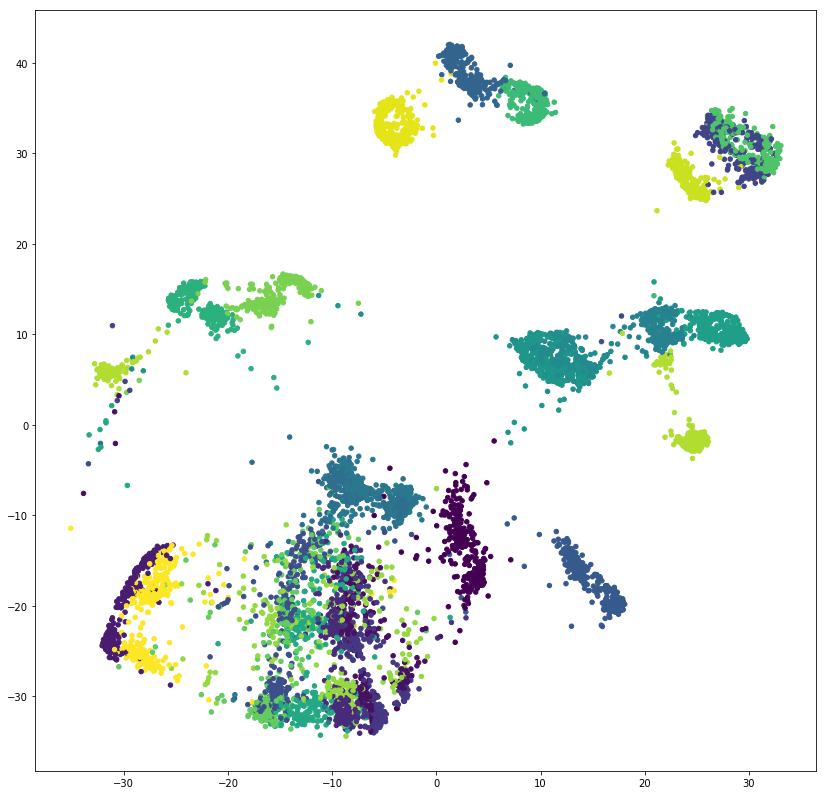

In [9]:
fig = plt.figure(figsize=(14, 14))
plt.scatter(Y_trimap[:, 0], Y_trimap[:, 1], 20, labels)
plt.show()

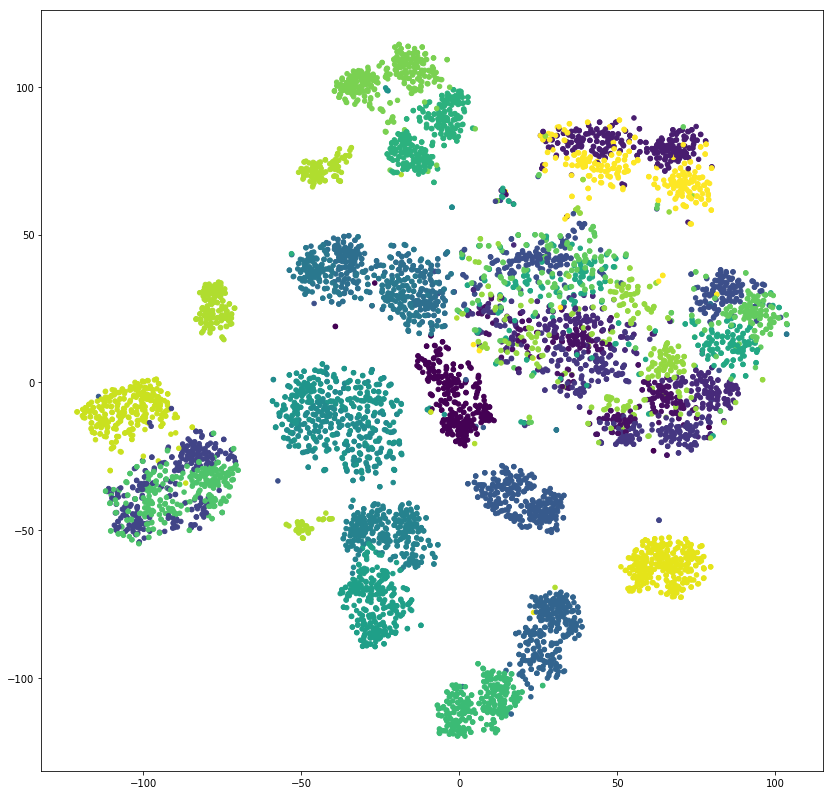

In [10]:
fig = plt.figure(figsize=(14, 14))
plt.scatter(Y_tsne[:, 0], Y_tsne[:, 1], 20, labels)
plt.show()

In [11]:
from metrics import mean_precision_recall, roc_metrics
from sklearn.neighbors import NearestNeighbors as knn

_, nbrs_input = knn(n_neighbors=50).fit(X).kneighbors(X)
_, nbrs_tsne = knn(n_neighbors=100).fit(Y_tsne).kneighbors(Y_tsne)
_, nbrs_trimap = knn(n_neighbors=100).fit(Y_trimap).kneighbors(Y_trimap)
tp_tsne, fp_tsne = roc_metrics(nbrs_input, nbrs_tsne)
tp_trimap, fp_trimap = roc_metrics(nbrs_input, nbrs_trimap)
recall_tsne, precision_tsne = mean_precision_recall(nbrs_input, nbrs_tsne)
recall_trimap, precision_trimap = mean_precision_recall(nbrs_input, nbrs_trimap)

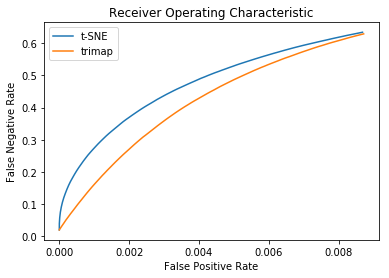

In [12]:
plt.plot(fp_tsne, tp_tsne, label='t-SNE')
plt.plot(fp_trimap, tp_trimap, label='trimap')
plt.xlabel('False Positive Rate')
plt.ylabel('False Negative Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()

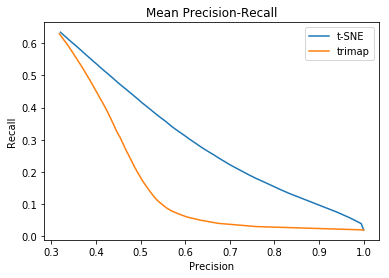

In [13]:
plt.plot(precision_tsne, recall_tsne, label='t-SNE')
plt.plot(precision_trimap, recall_trimap, label='trimap')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Mean Precision-Recall')
plt.legend()
plt.show()

# What we still need

* Trustworthiness-Continuity
* LargeVis
* Moving MNIST experiments over to this notebook